height: 480 width: 640 channels: 4


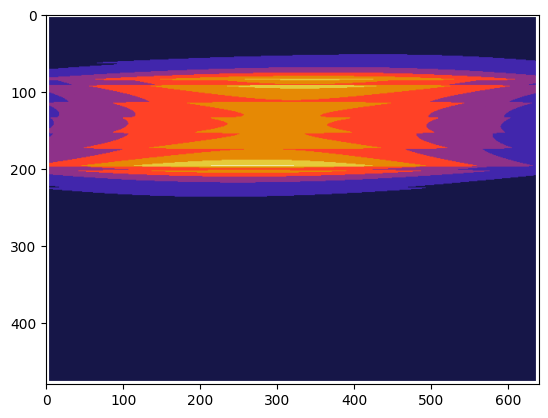

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import cv2  # librería open CV
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread(r'D:\Imagenes final\Total Images\FR-35_TMA_HAD1-259416-259499.png')

plt.imshow(image)

## pixels in image 
height, width, channels = image.shape

print('height:', height,'width:',width, 'channels:',channels)

In [ ]:
newSize = 256

resized_image = cv2.resize(image,(newSize,newSize))

res_heigh,res_wid = resized_image.shape[:2]

print(f'Dimensiones de la imagen redimensionada: {res_heigh}x{res_wid}')

In [ ]:
plt.imshow(image)

In [ ]:
plt.imshow(resized_image)

## Creación de imagenes resize

Conversión de archivo de texto a dataframe más manejable

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv(r'D:\Base_FR_RS.csv')
# print(df.head())
print(df.tail(12))

In [ ]:
# df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
# df = df.drop(range(59157,59162,1),axis=0)
df.tail()

In [ ]:
df.to_csv(r'D:\Base_FR_F.csv',index=False)

Imagnes resized

In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Base_FR_F.csv')
df.keys()

Index(['Sample ', 'Target ', 'File Name ', 'Path', 'Resized path'], dtype='object')

In [3]:
df.head()

,Sample,Target,File Name,Path,Resized path
0,D:\Imagenes final\Posible False\FR-35_TMA_HAD1...,0.0,FR-35_TMA_HAD1-10066244-10066310.png,D:\Resized images\FR-35_TMA_HAD1-10066244-1006...,D:\Resized images\
1,D:\Imagenes final\Posible False\FR-35_TMA_HAD1...,0.0,FR-35_TMA_HAD1-10108485-10108695.png,D:\Resized images\FR-35_TMA_HAD1-10108485-1010...,D:\Resized images\
2,D:\Imagenes final\Posible False\FR-35_TMA_HAD1...,0.0,FR-35_TMA_HAD1-10111934-10112012.png,D:\Resized images\FR-35_TMA_HAD1-10111934-1011...,D:\Resized images\
3,D:\Imagenes final\Posible False\FR-35_TMA_HAD1...,0.0,FR-35_TMA_HAD1-10113427-10113525.png,D:\Resized images\FR-35_TMA_HAD1-10113427-1011...,D:\Resized images\
4,D:\Imagenes final\Posible False\FR-35_TMA_HAD1...,0.0,FR-35_TMA_HAD1-10116049-10116140.png,D:\Resized images\FR-35_TMA_HAD1-10116049-1011...,D:\Resized images\


In [4]:
newSize = 257 # size resized image 

In [5]:
files = df['Sample ']
print(type(files))
sz = files.shape
print(sz[0])
resPath = df['Path']

<class 'pandas.core.series.Series'>
59157


In [6]:
for im in range(0,sz[0]):
    imgOr = Image.open(files[im])
    new_image = imgOr.resize((newSize, newSize))
    new_image.save(resPath[im])


In [ ]:
type(img)

In [ ]:
I  = np.asarray(Image.open(r'D:\Resized images\FR-35_TMA_HAD1-10066244-10066310.png'))

In [ ]:
I.shape

In [ ]:
plt.imshow(I)

In [ ]:
transf = transforms.ToTensor()
tenImg = transf(img)

### Generación de dataframe solo de imagen resize y target

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'D:\Base_FR_F.csv')

In [ ]:
df.head()

In [ ]:
df.keys()

In [ ]:
resTar = ['Path','Target ']

In [ ]:
newDF = df[resTar]

In [ ]:
newDF

In [ ]:
newDF.to_csv(r'D:\Base_Resized.csv',index=False)

## Separar en positivos y negativos

In [ ]:
df = pd.read_csv(r'D:\Base_Resized.csv')

In [ ]:
df.head()

In [ ]:
posFR = df['Target '] == 1
falFR = df['Target '] == 0 

In [ ]:
dfposFR = df[posFR]
dfposFR.head()
dfposFR.to_csv(r'D:\Base_ResizedPostive.csv',index=False)

In [ ]:
dffalFR = df[falFR]
dffalFR.head()
dffalFR.to_csv(r'D:\Base_ResizedNegative.csv',index=False)

## Base aleatorizada

In [ ]:
df = pd.read_csv(r'D:\Base_Resized.csv')
df.head()

In [ ]:
dfRand = df.sample(frac=1).reset_index(drop=True)
dfRand.head()

In [ ]:
dfRand.to_csv(r'D:\Base_ResizedShuffe.csv',index=False)

In [ ]:
y = dfRand['Target '].astype('int64')

In [ ]:
y

## Separar en targer e imagen

In [ ]:
df = pd.read_csv(r'D:\Base_ResizedShuffe.csv')

In [ ]:
df.head()

In [ ]:
X = df.drop('Target ',axis=1)
y = df['Target ']

In [ ]:
X.to_csv(r'D:\onlyImage.csv',index=False)
y.to_csv(r'D:\onlyTarget.csv',index=False)

## Imagenes espectro, transformada, etc


In [1]:
import numpy as np     
import pandas as pd              
import matplotlib.pyplot as plt
from matplotlib import cm
import SignalClases
from Wavelet import Wavelet

### Ejemplo posible verdadera FR 

In [2]:
# FR-95_CBX_HPDp6-1086455-1086924

fold_T = 0
file_T = 6
lb_T = 5
indFR_T = [1086455,1086924]
indFR_T[0] -= 500
indFR_T[1] += 500
indFR_T

[1085955, 1087424]

In [3]:
# Señal Oiginal
orgSig_T = SignalClases.OrgSignal.getData(fold_T,file_T)
orgSigArr_T = orgSig_T[0]
org_T = orgSigArr_T[lb_T]
org_T # Señal TMA HAD1

D:\\Base de datos proyecto sin repeticion\\experimental CBX proyecto\\FR-95_CBX_n.mat


array([-0.00915527, -0.00671387, -0.01098633, ...,  0.07781982,
        0.08087158,  0.08026123])

In [4]:
print(orgSigArr_T.shape)

(8, 17460001)


In [5]:
# Señal Filtrada
filtSig_T = SignalClases.FiltSignal.getData(fold_T,file_T)           # Señal Filtrada
filtSigArr_T = filtSig_T[0]
filtSigArr_T.shape
filt_T = filtSigArr_T[lb_T]
filt_T

D:\\Base de datos filtrada\\CBX_f\\FR-95_CBX_f\\FR-95_CBX_f.mat


array([-1.12054128e-08, -7.32795905e-01, -1.40295632e+00, ...,
        4.34788045e-01,  2.32009760e-01,  9.82341183e-08])

In [ ]:
SWSig = SignalClases.SWSignal.getData(fold,8)               # Señal filtrada para detección de ondas lentas 
SWTMA  = SWSig[0]
SWTMA 

In [6]:
## Señal de tiempo
srate = 10000
sz_T = org_T.shape
timevec_T = np.arange(0,sz_T[0],1)/srate 
timevec_T.shape

(17460001,)

In [7]:
# Calculo de wavelet en fragmento de señal 
filtSigCopy_T = filt_T[indFR_T[0]:indFR_T[1]]
filtSigCopy_T.shape

(1469,)

In [8]:
time_T,frex_T,mWarr_T = Wavelet.getWavelet(filtSigCopy_T)

Text(0.06, 0.2, 'Frecuency (Hz)')

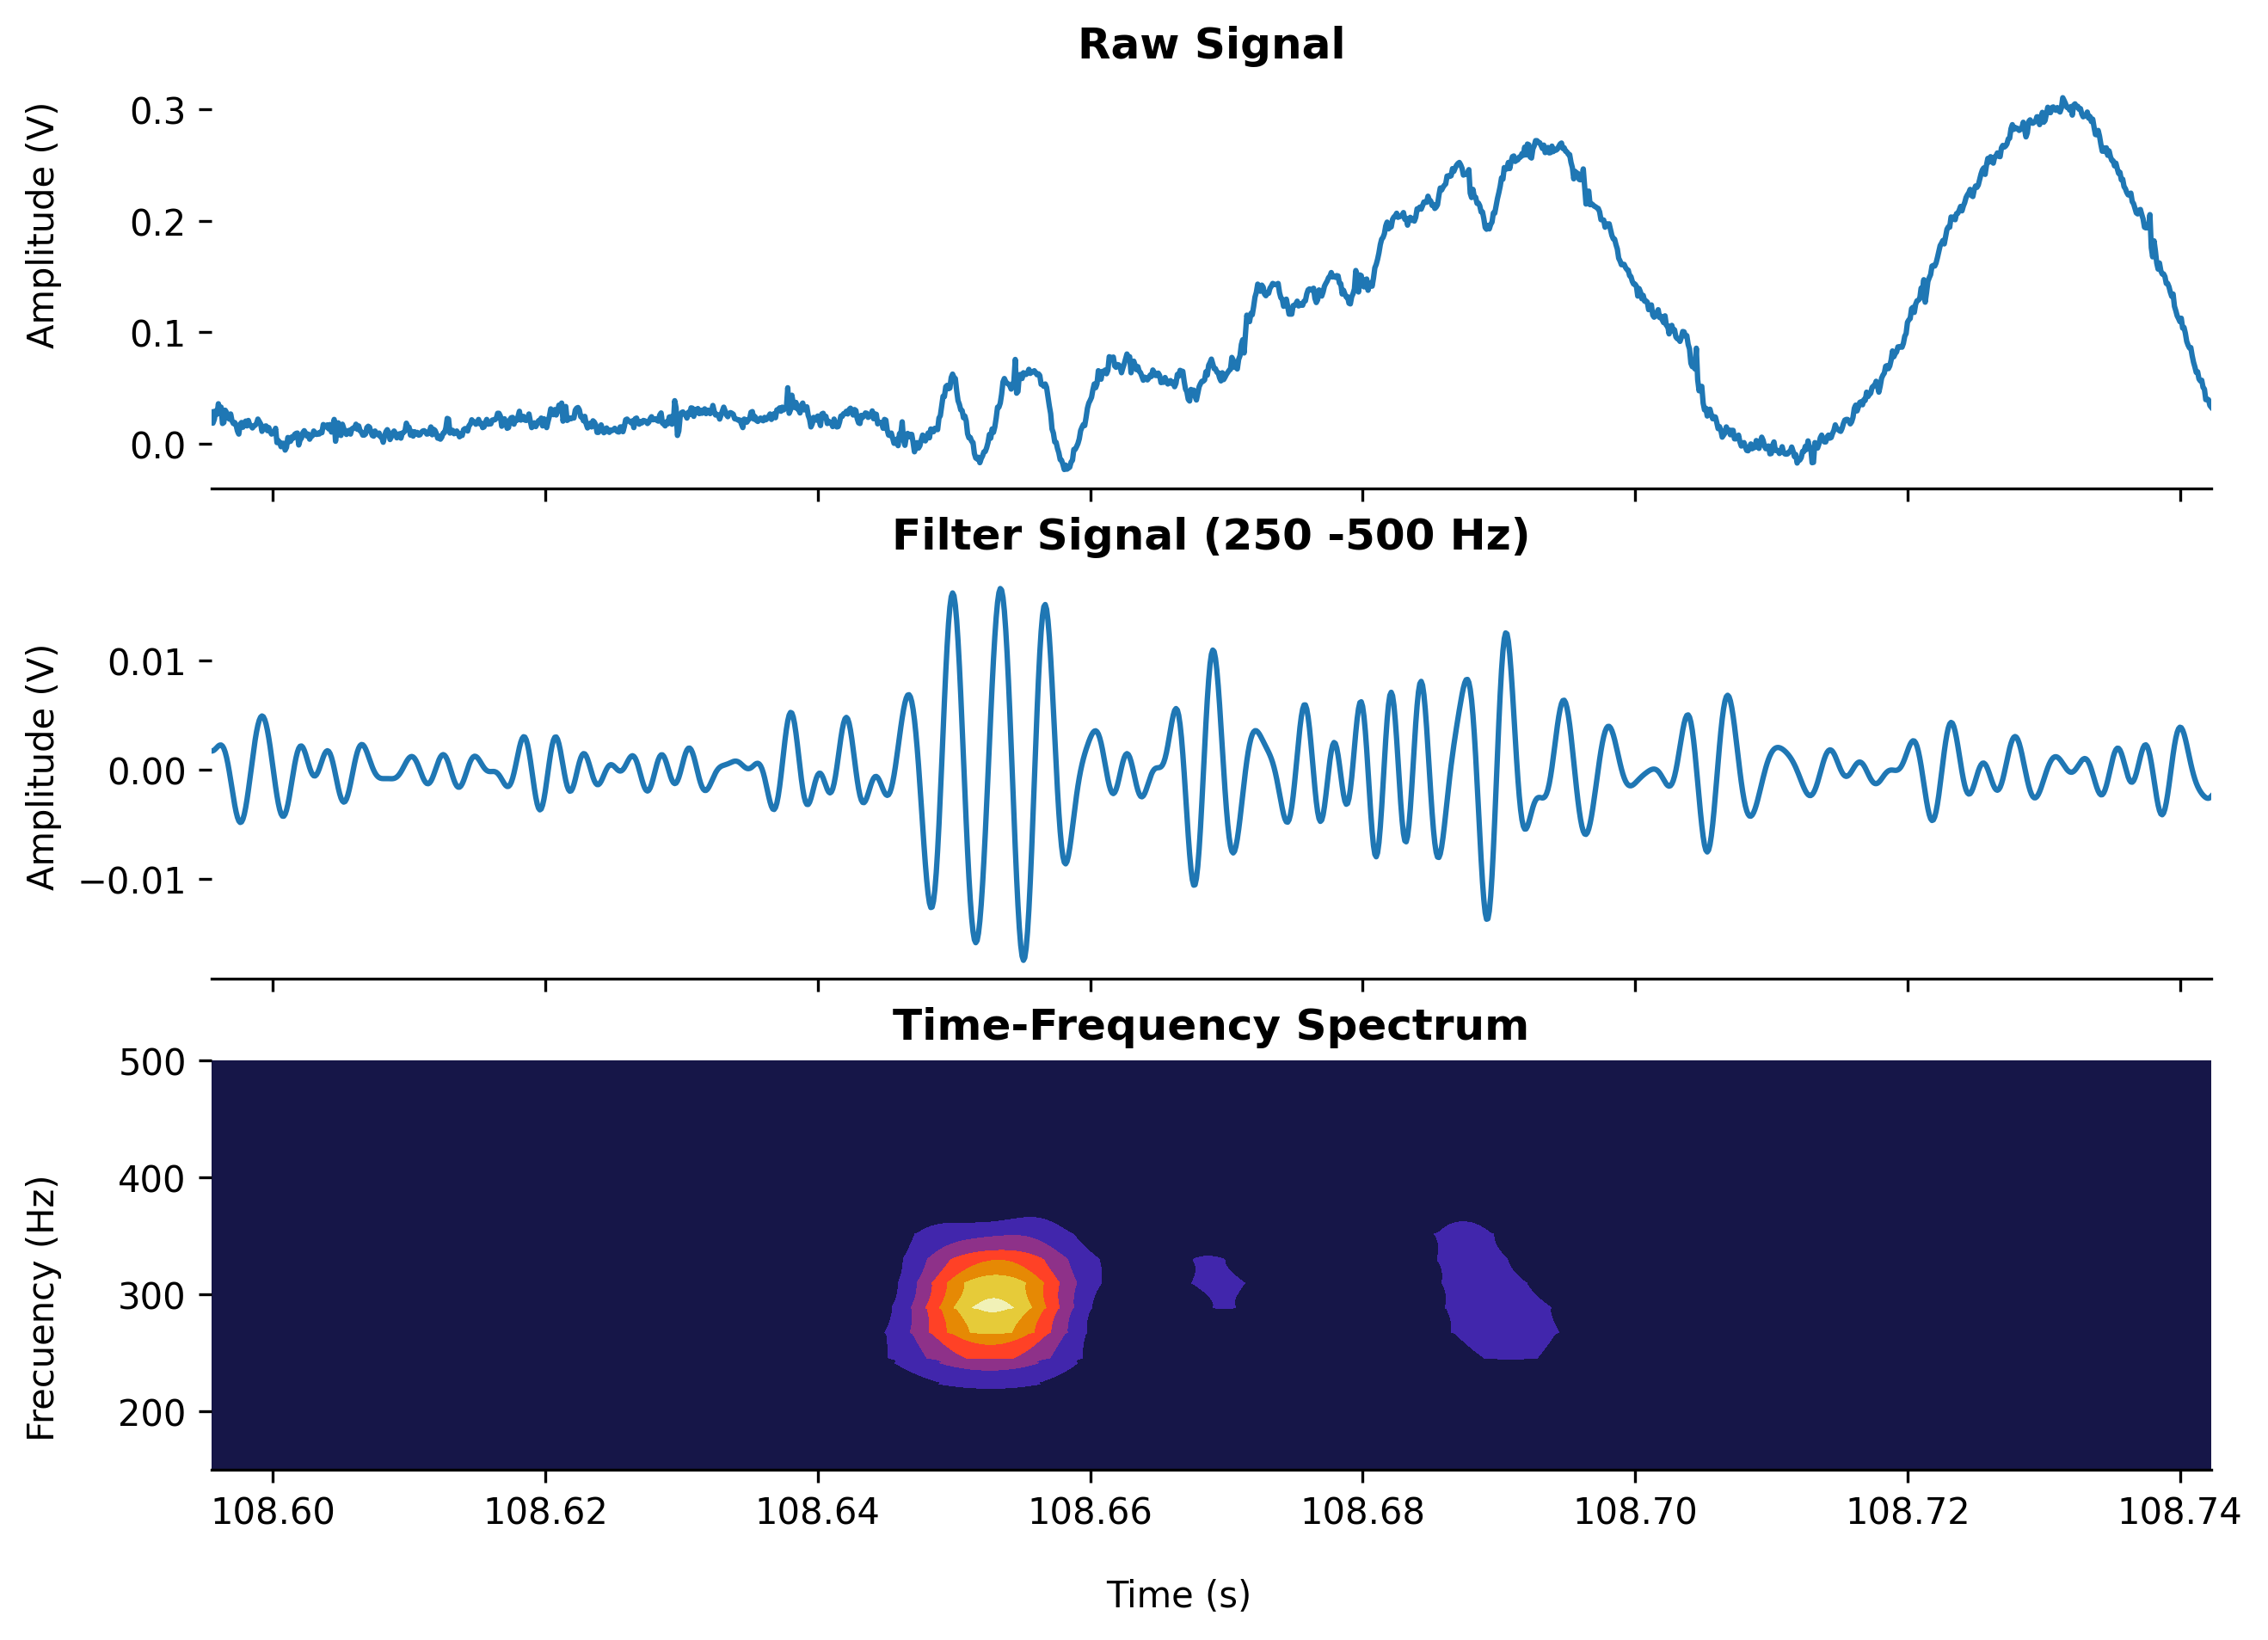

In [9]:
## Grafica de las señales

fig, axs = plt.subplots(3, sharex=True,figsize=(10,7), dpi=300)
axs[0].plot(timevec_T[indFR_T[0]:indFR_T[1]],org_T[indFR_T[0]:indFR_T[1]])    # Señal Orginal
axs[0].set_title('Raw Signal',fontsize = 12, fontweight ="bold")

# axs[1].plot(timevec[indFR[0]:indFR[1]],SWTMA[indFR[0]:indFR[1]])  # Senal Slow Wave
# axs[1].set_title('Slow Wave filtering Signal')


axs[1].plot(timevec_T[indFR_T[0]:indFR_T[1]],filt_T[indFR_T[0]:indFR_T[1]]*.001)   # Señal band pass 250-500 Hz
axs[1].set_title('Filter Signal (250 -500 Hz)',fontweight ="bold", fontsize = 12)
# plt.ylim(-0.2,0.2)

axs[2].contourf(timevec_T[indFR_T[0]:indFR_T[1]],frex_T,mWarr_T,cmap=cm.CMRmap)
axs[2].set_title('Time-Frequency Spectrum',fontweight ="bold", fontsize = 12)
axs[2]. set_ylim(150, 500)

# -------------------BEGIN-CHANGES------------------------
# Hide the all but the bottom spines (axis lines)
axs[0].spines["right"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)

axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)

axs[2].spines["right"].set_visible(False)
axs[2].spines["left"].set_visible(False)
axs[2].spines["top"].set_visible(False)

fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.8, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.2, 'Frecuency (Hz)', ha='center', va='center', rotation='vertical')

### Ejemplo posible falsa FR

In [10]:
# FR-35_TMA_HAD1-286385-286458
fold = 3
file = 0
lb = 0
indFR = [286385,286458]
indFR[0] -= 500
indFR[1] += 500
indFR

[285885, 286958]

In [11]:
# Señal Oiginal
orgSig = SignalClases.OrgSignal.getData(fold,file)
orgSigArr = orgSig[0]
orgTMA = orgSigArr[lb]
orgTMA # Señal TMA HAD1

D:\\Base de datos proyecto sin repeticion\\experimental TMA proyecto\\FR-35_TMA_n.mat


array([-0.00946045, -0.01190186, -0.01586914, ..., -0.03326416,
       -0.03509521, -0.03417969])

In [12]:
# Señal Filtrada
filtSig = SignalClases.FiltSignal.getData(fold,file)           # Señal Filtrada
filtSigArr = filtSig[0]
filtTMA = filtSigArr[0]
filtTMA

D:\\Base de datos filtrada\\TMA_f\\FR-35_TMA_f\\FR-35_TMA_f.mat


array([-1.15789276e-08,  1.79547533e+00,  3.51122116e+00, ...,
        1.81083497e+00,  9.38253077e-01, -4.18335434e-08])

In [13]:
SWSig = SignalClases.SWSignal.getData(fold,lb)               # Señal filtrada para detección de ondas lentas 
SWTMA  = SWSig[0]
SWTMA 

D:\\Slow Wave Filter\\experimental TMA proyecto\\FR-35_TMA_SWF\\FR-35_TMA_SWF.mat


KeyboardInterrupt: 

In [14]:
## Señal de tiempo
srate = 10000
sz = orgTMA.shape
timevec = np.arange(0,sz[0],1)/srate 
timevec.shape

(15920001,)

In [15]:
# Calculo de wavelet en fragmento de señal 
filtSigCopy = filtTMA[indFR[0]:indFR[1]]
filtSigCopy.shape

(1073,)

In [16]:
time,frex,mWarr = Wavelet.getWavelet(filtSigCopy)

Text(0.06, 0.2, 'Frecuency (Hz)')

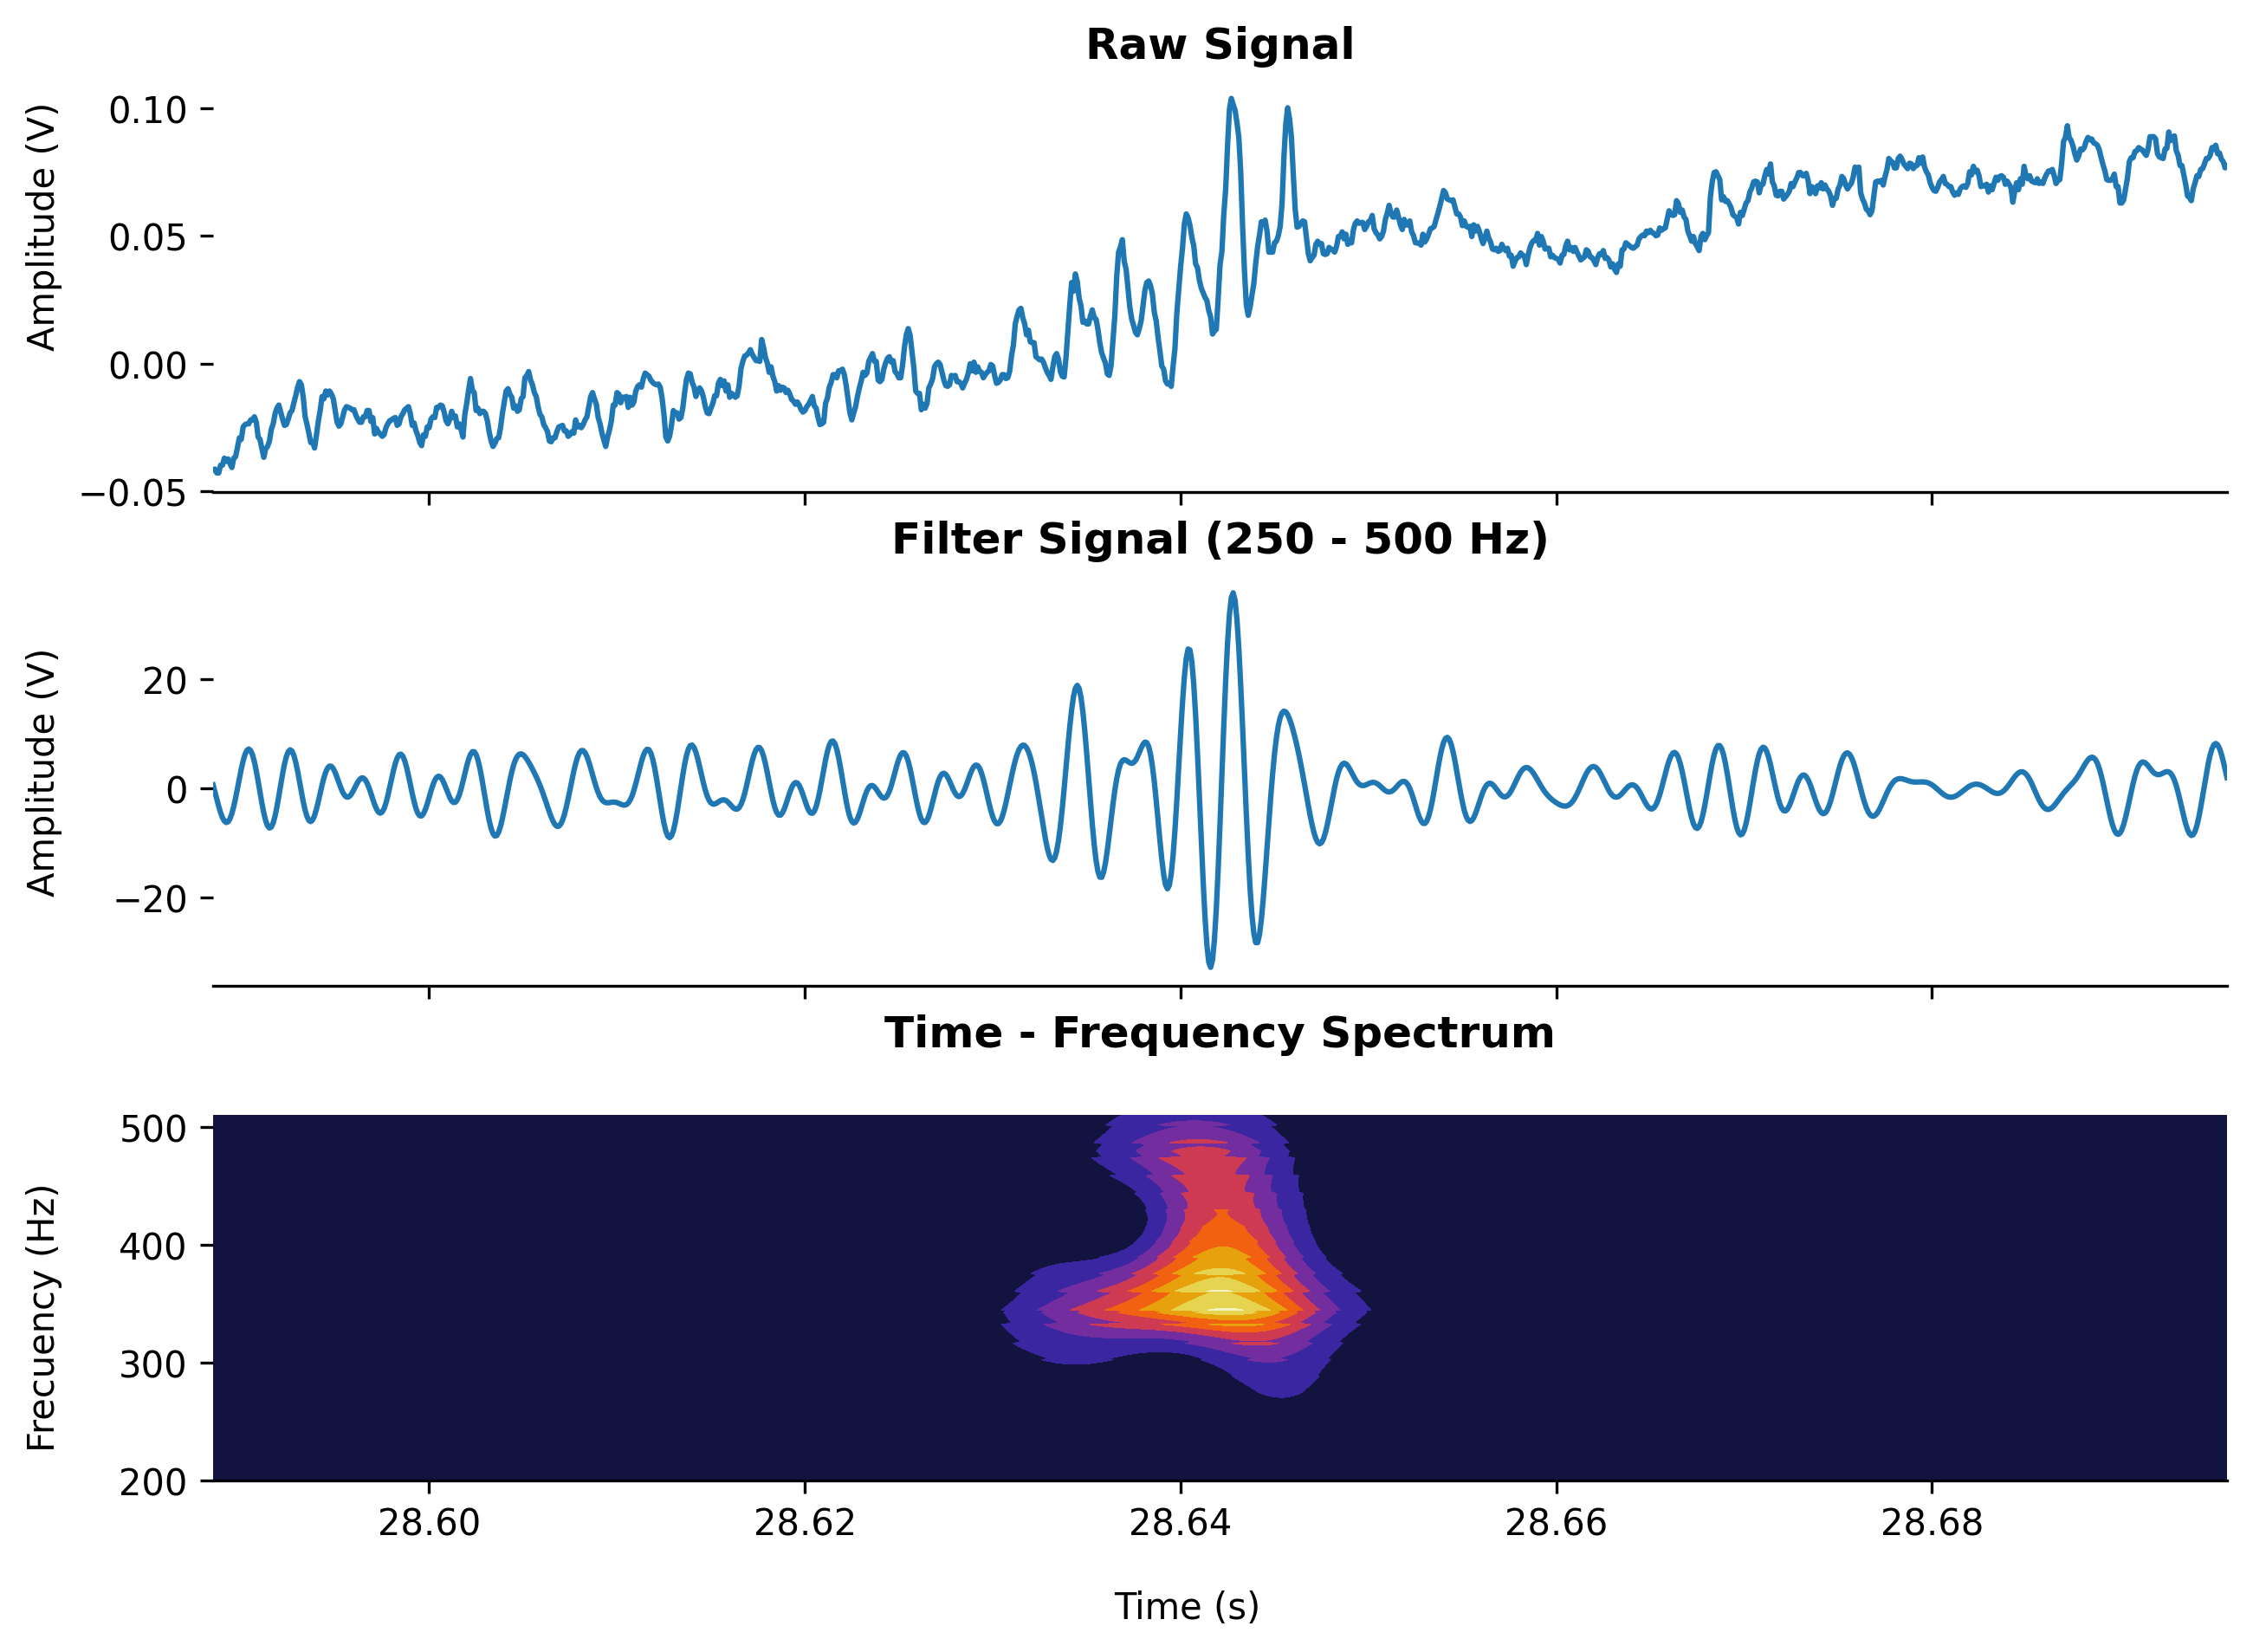

In [80]:
## Grafica de las señales

fig, axs = plt.subplots(3, sharex=True, figsize=(10,7), dpi=300)
axs[0].plot(timevec[indFR[0]:indFR[1]],orgTMA[indFR[0]:indFR[1]])    # Señal Orginal
axs[0].set_title('Raw Signal',fontweight ="bold", fontsize = 12)

# axs[1].plot(timevec[indFR[0]:indFR[1]],SWTMA[indFR[0]:indFR[1]])  # Senal Slow Wave
# axs[1].set_title('Slow Wave filtering Signal')
axs[1].plot(timevec[indFR[0]:indFR[1]],filtTMA[indFR[0]:indFR[1]])   # Señal band pass 250-500 Hz
axs[1].set_title('Filter Signal (250 - 500 Hz)',fontweight ="bold", fontsize = 12)
# plt.ylim(-0.2,0.2)

contour = axs[2].contourf(timevec[indFR[0]:indFR[1]],frex,mWarr,cmap=cm.CMRmap)
axs[2].set_title('Time - Frequency Spectrum',fontweight ="bold", fontsize = 12)
axs[2]. set_ylim(200, 550)

# -------------------BEGIN-CHANGES------------------------
# Hide the all but the bottom spines (axis lines)
axs[0].spines["right"].set_visible(False)
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)

axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)

axs[2].spines["right"].set_visible(False)
axs[2].spines["left"].set_visible(False)
axs[2].spines["top"].set_visible(False)

fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.8, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.2, 'Frecuency (Hz)', ha='center', va='center', rotation='vertical')

Ambas imagenes en una sola

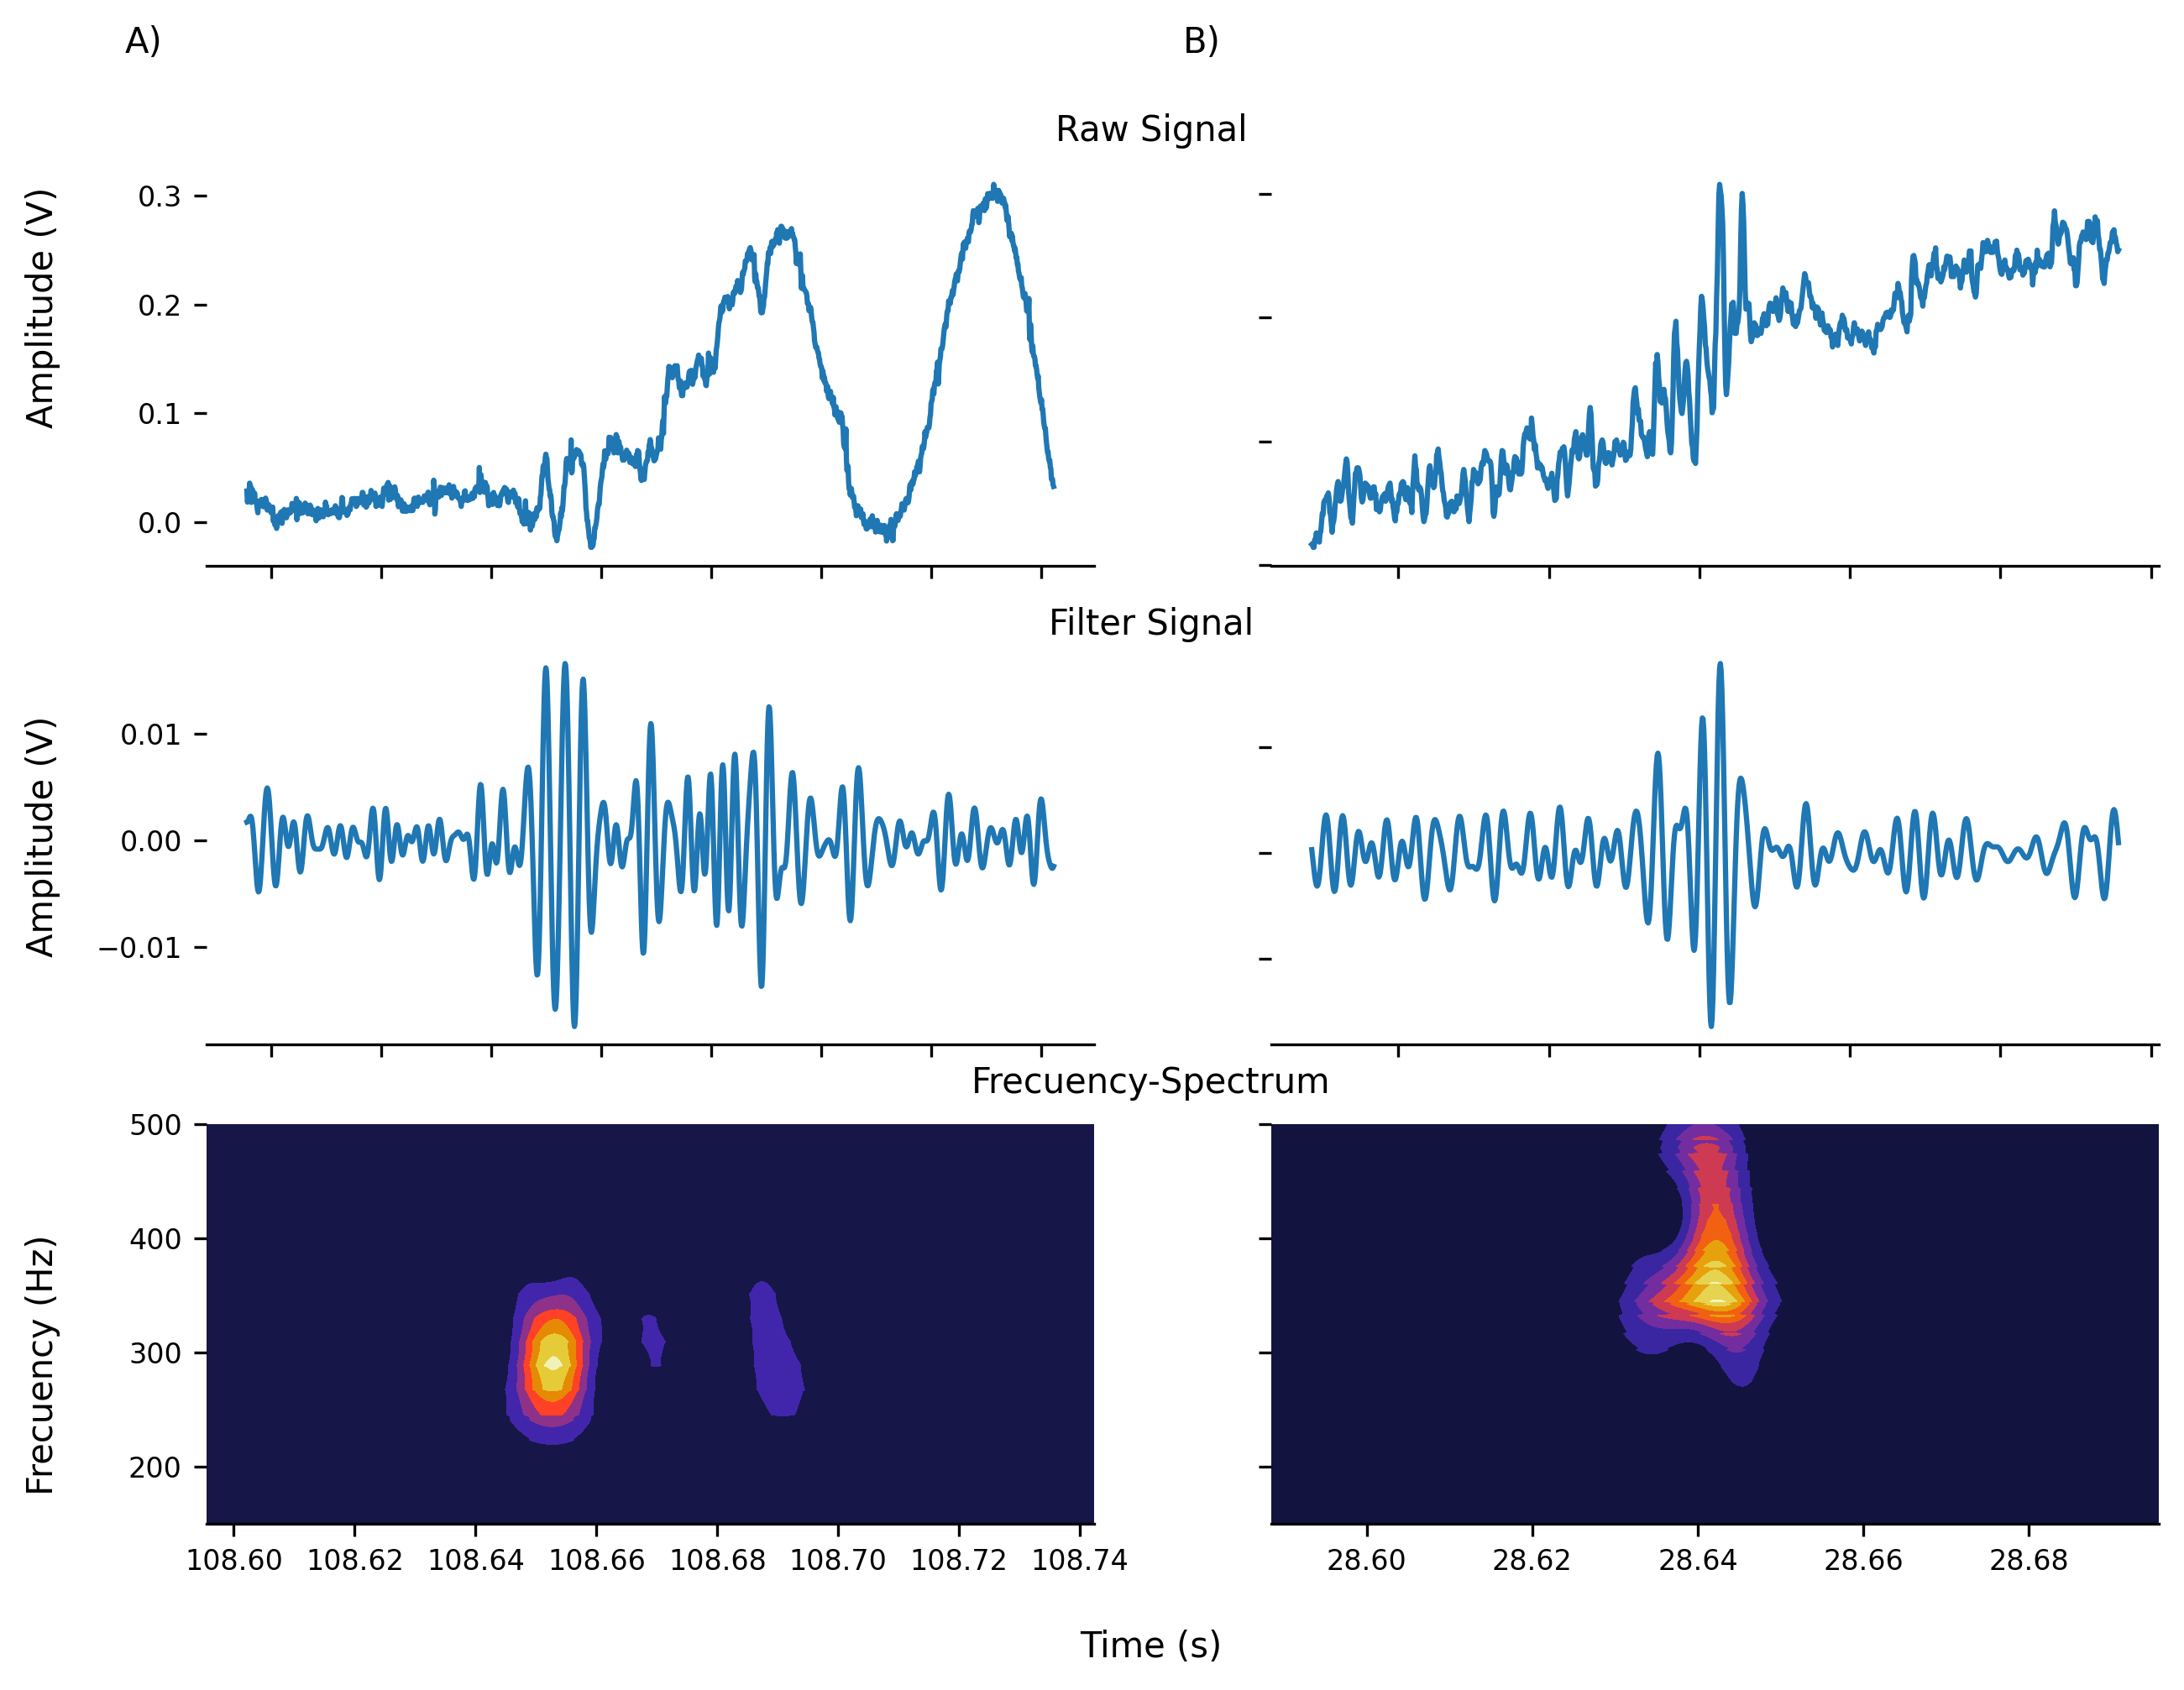

In [112]:
## Grafica de las señales
import matplotlib.ticker as ticker

fig, axs = plt.subplots(3,2, figsize=(10,7), dpi=300)

# Raw signal
axs[0,0].plot(timevec_T[indFR_T[0]:indFR_T[1]],org_T[indFR_T[0]:indFR_T[1]])    # Señal Orginal
# axs1[0].set_title('Raw Signal',fontsize = 12, fontweight ="bold")
axs[0,1].plot(timevec[indFR[0]:indFR[1]],orgTMA[indFR[0]:indFR[1]])    # Señal Orginal
# axs2[0].set_title('Raw Signal',fontweight ="bold", fontsize = 12)


axs[1,0].plot(timevec_T[indFR_T[0]:indFR_T[1]],filt_T[indFR_T[0]:indFR_T[1]]*.001)   # Señal band pass 250-500 Hz
# axs[1].set_title('Filter Signal (250 -500 Hz)',fontweight ="bold", fontsize = 12)
axs[1,1].plot(timevec[indFR[0]:indFR[1]],filtTMA[indFR[0]:indFR[1]])   # Señal band pass 250-500 Hz
# axs[1].set_title('Filter Signal (250 - 500 Hz)',fontweight ="bold", fontsize = 12)
# plt.ylim(-0.2,0.2)

axs[2,0].contourf(timevec_T[indFR_T[0]:indFR_T[1]],frex_T,mWarr_T,cmap=cm.CMRmap)
# axs[2].set_title('Time-Frequency Spectrum',fontweight ="bold", fontsize = 12)
axs[2,1].contourf(timevec[indFR[0]:indFR[1]],frex,mWarr,cmap=cm.CMRmap)
axs[2,0]. set_ylim(150, 500)
axs[2,1]. set_ylim(150, 500)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# -------------------BEGIN-CHANGES------------------------
# Hide the all but the bottom spines (axis lines)
axs[0,0].spines["right"].set_visible(False)
axs[0,0].spines["left"].set_visible(False)
axs[0,0].spines["top"].set_visible(False)
axs[0,1].spines["right"].set_visible(False)
axs[0,1].spines["left"].set_visible(False)
axs[0,1].spines["top"].set_visible(False)

axs[1,0].spines["right"].set_visible(False)
axs[1,0].spines["left"].set_visible(False)
axs[1,0].spines["top"].set_visible(False)
axs[1,1].spines["right"].set_visible(False)
axs[1,1].spines["left"].set_visible(False)
axs[1,1].spines["top"].set_visible(False)

axs[2,0].spines["right"].set_visible(False)
axs[2,0].spines["left"].set_visible(False)
axs[2,0].spines["top"].set_visible(False)
axs[2,1].spines["right"].set_visible(False)
axs[2,1].spines["left"].set_visible(False)
axs[2,1].spines["top"].set_visible(False)

fig.text(0.5, 0.9, 'Raw Signal', ha='center', va='center')
fig.text(0.1, 0.95, 'A)', ha='center', va='center')
fig.text(0.52, 0.95, 'B)', ha='center', va='center')
fig.text(0.5, 0.62, 'Filter Signal', ha='center', va='center')
fig.text(0.5, 0.36, 'Frecuency-Spectrum', ha='center', va='center')
fig.text(0.5, 0.04, 'Time (s)', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.8, 'Amplitude (V)', ha='center', va='center', rotation='vertical')
fig.text(0.06, 0.2, 'Frecuency (Hz)', ha='center', va='center', rotation='vertical')

for ax in axs.flat:
    ax.label_outer()

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 10
